**<font size=5> Module Title: Machine Learning for AI </font>**

**<font size=5> Assessment Title: ML_CA2 </font>**

**<font size=4> Lecturer Name: Dr. David McQuaid </font>**

**<font size=4> Student Name: Chia Hua Lin &emsp; &emsp; ID: 2020044 </font>**

**<font size=3> GitHub Link: https://github.com/Awa25/ML_CA2 </font>**

## Scenario:

This CA consists of 2 parts. Neural Networks and Semantic analysis.

<font size = 4> <b><u> Neural Networks </u></b></font>

You are required to take data stored file “BankRecords.csv”, available on Moodle and process the data into a DataFrame.
You are then required to train a Neural Network to predict the “Income(Thousands’)” of the customers, including tuning the network to achieve the best results.
You must also compare your neural network to a standard ML regressor of your choosing and discuss your findings in the context of the problem at hand.


<font size = 4> <b><u> Semantic Analysis </u></b></font>

You are required to source text data from any social media platform on any topic that you choose and perform semantic analysis on the text. This analysis should provide a visualization of the overall sentiment of your text data , showing the positive, neutral, and negative sentiment expressed. You will require at least 1000 text observations.

<font size = 4> <b><u> Requirements </u></b></font>

- Perform any preparation of the data (for both the Neural Network and Semantic Analysis data) , that you feel is necessary, using python in your Jupyter notebook. Explain your rationale behind your data preparation and how it will assist you. [0-30]
- Create and implement at least 1 Regression algorithm and 1 Neural Network that will output a Prediction of the “Income(Thousands’)” of the customers. Test these models and try to improve it as you see fit discussing your rationale. Discuss your findings and final rational for choosing a particular Regression algorithm. [0-40]
- Make a Prediction of a new customers income, who is not available in the original dataset. [0-5]
- Perform Sentiment analysis on your text data and discuss your findings in detail. [0-20]
- Visualize your sentiment analysis showing the positive, neutral, negative sentiment expressed. [0-5]

# Part 1: Neural Networks

## • Install the necessary libraries

In [1]:
!pip install tensorflow

## • Import necessary libraries

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

## • Data Loading and Exploration

<font size = "3"> Predicting Customer Income using Neural Networks </font>

In [3]:
# Load the dataset
df = pd.read_csv('BankRecords.csv')

In [4]:
# Display the first few rows of the dataframe
df.head()

,ID,Age,Experience(Years),Income(Thousands's),Sort Code,Family,Credit Score,Education,Mortgage(Thousands's),Personal Loan,Securities Account,CD Account,Online Banking,CreditCard
0,1,25,1,49,91107,4,1.6,Diploma,0,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Diploma,0,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Diploma,0,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Degree,0,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Degree,0,No,No,No,No,Yes


In [5]:
# Rename the columns for clarity
df.rename(columns = {'Income(Thousands\'s)': 'Income(Thousands)'}, inplace = True)

### • Data Exploration Let's explore the dataset to understand its structure and identify any potential issues.

In [6]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     5000 non-null   int64  
 1   Age                    5000 non-null   int64  
 2   Experience(Years)      5000 non-null   int64  
 3   Income(Thousands)      5000 non-null   int64  
 4   Sort Code              5000 non-null   int64  
 5   Family                 5000 non-null   int64  
 6   Credit Score           5000 non-null   float64
 7   Education              5000 non-null   object 
 8   Mortgage(Thousands's)  5000 non-null   int64  
 9   Personal Loan          5000 non-null   object 
 10  Securities Account     5000 non-null   object 
 11  CD Account             5000 non-null   object 
 12  Online Banking         5000 non-null   object 
 13  CreditCard             5000 non-null   object 
dtypes: float64(1), int64(7), object(6)
memory usage: 547.0+ 

In [7]:
# Summary statistics of the dataset
df.describe()

,ID,Age,Experience(Years),Income(Thousands),Sort Code,Family,Credit Score,Mortgage(Thousands's)
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,56.498800
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,101.713802
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,101.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,635.000000


In [8]:
# Check for missing values
df.isnull().sum()

ID                       0
Age                      0
Experience(Years)        0
Income(Thousands)        0
Sort Code                0
Family                   0
Credit Score             0
Education                0
Mortgage(Thousands's)    0
Personal Loan            0
Securities Account       0
CD Account               0
Online Banking           0
CreditCard               0
dtype: int64

### • Data Preprocessing We'll handle missing values, encode categorical variables, and normalize the data.

In [9]:
# Convert all column names to strings
df.columns = df.columns.astype(str)

In [10]:
# Define feature columns and target column
feature_columns = df.columns.difference(['Income(Thousands)'])
target_column = 'Income(Thousands)'

In [11]:
# Separate features and target
X = df[feature_columns]
y = df[target_column]

In [12]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [13]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [14]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [16]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## • Neural Network Model

In [19]:
from tensorflow.keras.layers import Dropout

# Build the neural network with dropout regularization
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [20]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics=['mae'])

In [21]:
# Train the model - 100 epochs and validation_step at 0.2
history = model.fit(
    X_train, 
    y_train, 
    epochs = 100, 
    batch_size = 32, 
    validation_split = 0.2, 
    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7598.0986 - mae: 73.4672 - val_loss: 3708.4624 - val_mae: 46.3334
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2912.1479 - mae: 40.7591 - val_loss: 1463.4077 - val_mae: 26.9235
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1612.0172 - mae: 30.9020 - val_loss: 1275.3970 - val_mae: 24.5046
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1480.3273 - mae: 29.4379 - val_loss: 1211.7681 - val_mae: 23.8322
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1548.8221 - mae: 30.5736 - val_loss: 1196.6151 - val_mae: 23.5281
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1353.0515 - mae: 28.1944 - val_loss: 1169.8046 - val_mae: 23.4042
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1425.6976 - mae: 29.2744 - val_loss: 1182.1731 - val_mae: 23.5153
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1334.2856 - mae: 28.4641 - val_loss: 1124.6260 - v

Epoch 52/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1146.1123 - mae: 25.8714 - val_loss: 798.9878 - val_mae: 22.2412
Epoch 53/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1059.7986 - mae: 25.2555 - val_loss: 787.6711 - val_mae: 22.1519
Epoch 54/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1101.7949 - mae: 25.2570 - val_loss: 791.8718 - val_mae: 22.4422
Epoch 55/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1070.7998 - mae: 25.1131 - val_loss: 787.9604 - val_mae: 22.3859
Epoch 56/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1125.3220 - mae: 26.0771 - val_loss: 788.5825 - val_mae: 22.2280
Epoch 57/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1044.6040 - mae: 25.2290 - val_loss: 794.0692 - val_mae: 22.2768
Epoch 58/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1090.2589 - mae: 25.2978 - val_loss: 788.4319 - val_mae: 22.1869
Epoch 59/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1158.1210 - mae: 26.3006 - val_loss: 781.8611 - v

In [22]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)

# Calculate Mean Squared Error
mse = loss 

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 893.0400 - mae: 22.8115 


In [23]:
#print(f"Test Loss: {loss}")

print("Mean Absolute Error on Test Set:", mae)
print("Mean Squared Error on Test Set:", mse)

Mean Absolute Error on Test Set: 22.403263092041016
Mean Squared Error on Test Set: 810.8665161132812


In [49]:
# Predict the values on test data and check the accuracy of the model
nn_predictions = model.predict(X_test)
nn_mse = mean_squared_error(y_test, nn_predictions)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [50]:
print(f'Neural Network MSE: {nn_mse}')

Neural Network MSE: 3759.853753799102


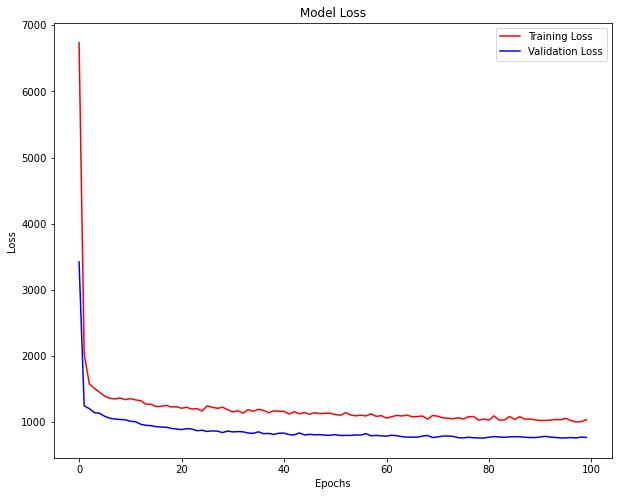

In [51]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

### • Fine tunning Model

In [52]:
from tensorflow.keras.optimizers import Adam

# Define a custom learning rate
learning_rate = 0.001

In [54]:
# Build the neural network
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'linear'))

In [55]:
# Compile the model with a custom learning rate
optimizer = Adam(learning_rate = learning_rate)
model.compile(optimizer = optimizer, loss = 'mean_squared_error')

In [56]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    batch_size = 32, 
                    validation_split = 0.2, 
                    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 7193.1621 - val_loss: 4017.0381
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3020.3364 - val_loss: 1371.1156
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1765.6073 - val_loss: 1229.3319
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1626.2186 - val_loss: 1202.9901
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1539.5825 - val_loss: 1192.1938
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1378.8436 - val_loss: 1141.0613
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1377.1372 - val_loss: 1108.8076
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1419.7571 - val_loss: 1096.2196
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1354.8937 - val_loss: 1080.5377
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1342.6385 - val_loss: 1050.7947
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1283.93

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1043.4382 - val_loss: 802.1464
Epoch 66/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1077.9705 - val_loss: 777.8468
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1051.4650 - val_loss: 777.0019
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1066.5458 - val_loss: 788.7189
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1028.0526 - val_loss: 794.5298
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1079.5425 - val_loss: 775.7504
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1026.4749 - val_loss: 789.5115
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1012.8281 - val_loss: 785.8163
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1011.0806 - val_loss: 809.1836
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1135.1641 - val_loss: 782.3211
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1041.3514 - val_loss:

In [57]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss with Custom Learning Rate: {loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 901.9978  
Test Loss with Custom Learning Rate: 814.0995483398438


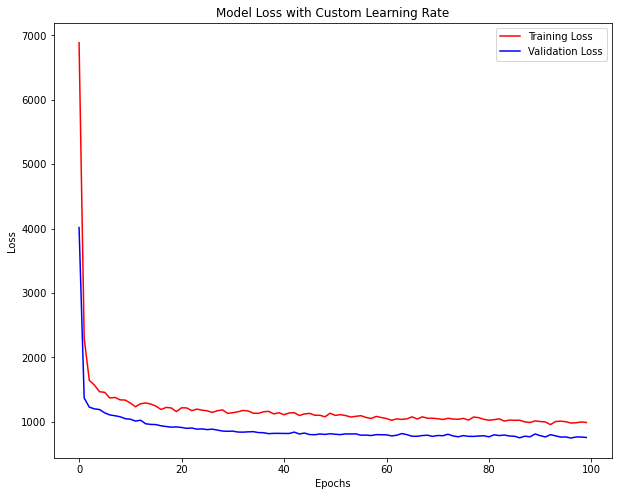

In [58]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss with Custom Learning Rate')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

### • Fine Tune more

In [59]:
from tensorflow.keras.regularizers import l2

# Build the neural network with L2 regularization
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(32, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(16, activation = 'relu', kernel_regularizer = l2(0.01)))
model.add(Dense(1, activation = 'linear', kernel_regularizer = l2(0.01)))

In [60]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [61]:
# Train the model
history = model.fit(X_train, y_train, 
                    epochs = 100, 
                    batch_size = 32, 
                    validation_split = 0.2, 
                    verbose = 1)

Epoch 1/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 7310.2866 - val_loss: 4582.0781
Epoch 2/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3528.7754 - val_loss: 1347.3423
Epoch 3/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1558.3638 - val_loss: 1261.8127
Epoch 4/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1528.5892 - val_loss: 1245.8915
Epoch 5/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1409.0839 - val_loss: 1174.2979
Epoch 6/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1403.3635 - val_loss: 1171.9359
Epoch 7/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1393.8374 - val_loss: 1138.2496
Epoch 8/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1290.8083 - val_loss: 1141.3969
Epoch 9/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1319.1703 - val_loss: 1121.7826
Epoch 10/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1229.1973 - val_loss: 1100.3826
Epoch 11/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1234.88

100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1082.3147 - val_loss: 803.1828
Epoch 66/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1065.5953 - val_loss: 823.8696
Epoch 67/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1027.3538 - val_loss: 816.4218
Epoch 68/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1047.4551 - val_loss: 864.9578
Epoch 69/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 942.8563 - val_loss: 803.9931
Epoch 70/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 994.5819 - val_loss: 818.7141
Epoch 71/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1062.8516 - val_loss: 836.4521
Epoch 72/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 994.4155 - val_loss: 792.7283
Epoch 73/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1035.2297 - val_loss: 808.2516
Epoch 74/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 971.7297 - val_loss: 852.3813
Epoch 75/100
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 988.2316 - val_loss: 809.

In [62]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Test Loss with L2 Regularization: {loss}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1046.0092
Test Loss with L2 Regularization: 948.5593872070312


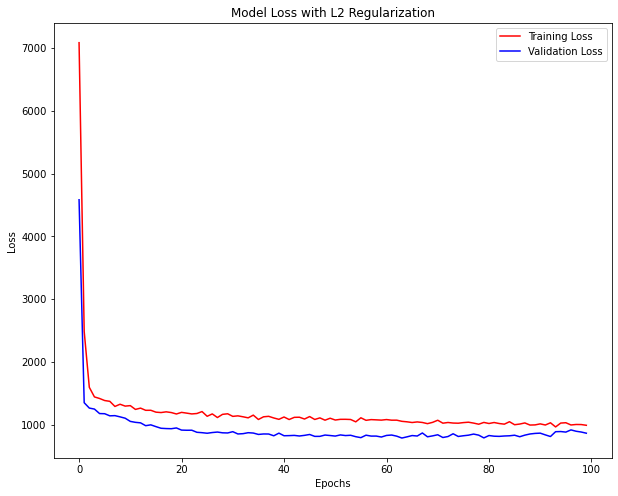

In [63]:
# Plot training history
plt.figure(figsize = (10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Model Loss with L2 Regularization')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show()

## • Random Forest Regressor

In [64]:
# Separate features and target
X = df.drop(columns = ['Income(Thousands)'])
y = df['Income(Thousands)']

In [65]:
# Preprocess categorical variables
categorical_features = X.select_dtypes(include = ['object']).columns
numerical_features = X.select_dtypes(include = ['int64', 'float64']).columns

In [66]:
# Create a column transformer for preprocessing
preprocessor = ColumnTransformer(
    transformers = [
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop = 'first'), categorical_features)
    ])

In [67]:
# Apply the transformations to the feature set
X_processed = preprocessor.fit_transform(X)

In [68]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size = 0.2, random_state = 42)

In [69]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [70]:
# Initialize and train the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators = 100, random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
# Predict and evaluate the model
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f"Random Forest Regressor Test MSE: {rf_mse}")

Random Forest Regressor Test MSE: 436.6706159


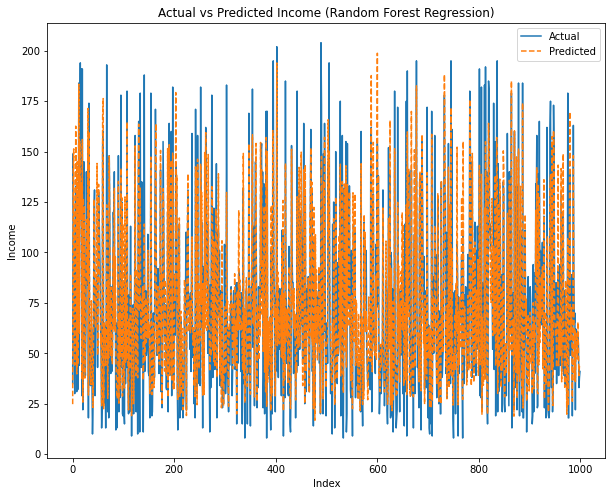

In [72]:
# Plot actual vs predicted values for Random Forest Regression
plt.figure(figsize = (10, 8))

plt.plot(y_test.values, label='Actual')
plt.plot(rf_predictions, label='Predicted', linestyle='--')

plt.title('Actual vs Predicted Income (Random Forest Regression)')
plt.xlabel('Index')
plt.ylabel('Income')

plt.legend()
plt.show()

## • Comparing of both Models

In [73]:
# Evaluate the neural network model
#nn_loss = model.evaluate(X_test, y_test)
#print(f"Neural Network Test MSE: {nn_loss}")

print(f'\n• Neural Network Test MSE: {nn_mse}\n')

# Random Forest Regressor Results
print(f"• Random Forest Regressor Test MSE: {rf_mse}")


• Neural Network Test MSE: 3759.853753799102

• Random Forest Regressor Test MSE: 436.6706159


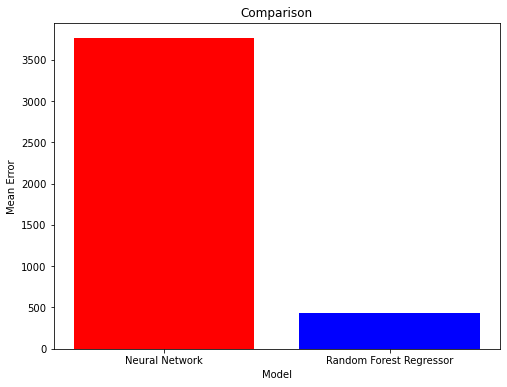

In [74]:
# Plot comparing
plt.figure(figsize = (8, 6))
plt.bar(['Neural Network', 'Random Forest Regressor'], 
        [nn_mse, rf_mse], 
        color = ['red', 'blue'])

plt.title('Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Error')
plt.show()

## • Make a Prediction of a new customers income, who is not available in the original dataset

In [75]:
# Set the random seed to ensure reproducibility
np.random.seed(42)

In [76]:
# Generate the number of rows for the dataset
num_rows = 2000

In [77]:
# Generate random data using numpy
data = {
    "ID": np.arange(1, num_rows + 1),
    "Experience(Years)": np.random.randint(1, 42, size = num_rows),
    "Income(Thousands)": np.random.randint(45000, 60001, size = num_rows),
    "Sort Code": np.random.randint(90000, 95001, size = num_rows),
    "Education": np.random.choice(["Diploma", "Degree", "Masters"], size = num_rows),
    "Mortgage_Thousands": np.random.randint(0, 156, size = num_rows),
    "Personal Loan": np.random.choice(["Yes", "No"], size = num_rows),
}

In [78]:
# Creat DataFrame
df = pd.DataFrame(data)

In [79]:
# Convert the Education and Personal Loan columns to numerical values
df['Education'] = df['Education'].map({'Diploma': 1, 'Degree': 2, 'Masters': 3})
df['Personal Loan'] = df['Personal Loan'].map({'No': 0, 'Yes': 1})

In [80]:
# Separate features and labels
X = df.drop(columns = ['ID', 'Income(Thousands)'])
y = df['Income(Thousands)'] / 1000  # Convert income to thousands

In [81]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [82]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [84]:
# Build a neural network model
model = Sequential()
model.add(Dense(64, input_dim = X_train.shape[1], activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1))  # Output layer

In [85]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'mse')

In [86]:
# Train the model
model.fit(X_train, y_train, epochs = 100, batch_size = 10, validation_split = 0.2)

Epoch 1/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2465.6794 - val_loss: 79.2364
Epoch 2/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 61.9863 - val_loss: 54.4498
Epoch 3/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44.7543 - val_loss: 48.2867
Epoch 4/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 38.5765 - val_loss: 41.8142
Epoch 5/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.5235 - val_loss: 36.5442
Epoch 6/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29.4996 - val_loss: 33.9529
Epoch 7/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.4551 - val_loss: 30.2001
Epoch 8/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 25.1469 - val_loss: 28.6325
Epoch 9/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.9704 - val_loss: 26.5489
Epoch 10/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22.7115 - val_loss: 27.0602
Epoch 11/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.8708 - val_loss: 23.9396
Epoch 12/100
128/

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.2428 - val_loss: 21.4264
Epoch 68/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.0042 - val_loss: 20.1426
Epoch 69/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.7703 - val_loss: 20.5038
Epoch 70/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.5409 - val_loss: 20.7210
Epoch 71/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 18.1121 - val_loss: 21.3001
Epoch 72/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 19.4051 - val_loss: 20.0231
Epoch 73/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.9790 - val_loss: 20.6995
Epoch 74/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 17.9178 - val_loss: 20.8087
Epoch 75/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.4846 - val_loss: 21.9641
Epoch 76/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.3599 - val_loss: 19.8208
Epoch 77/100
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17.4900 - val_loss: 20.9889
Epoch 78/100
128/128 ━━

In [87]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.5432  
Model Loss: 18.368085861206055


In [88]:
# Predict income for new customers
# New customer data should have the same number and order of features as the training data
new_customers = np.array([
    [28, 92000, 2, 50, 1],  # Example of new customer 1
    [50, 91000, 3, 100, 0]  # Example of new customer 2
])  # Example new customer data

In [89]:
# Standardize new data
new_customers = scaler.transform(new_customers)  
predictions = model.predict(new_customers)
print(f'Predicted Income (in thousands): {predictions.flatten()}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
Predicted Income (in thousands): [51.53137 54.66963]


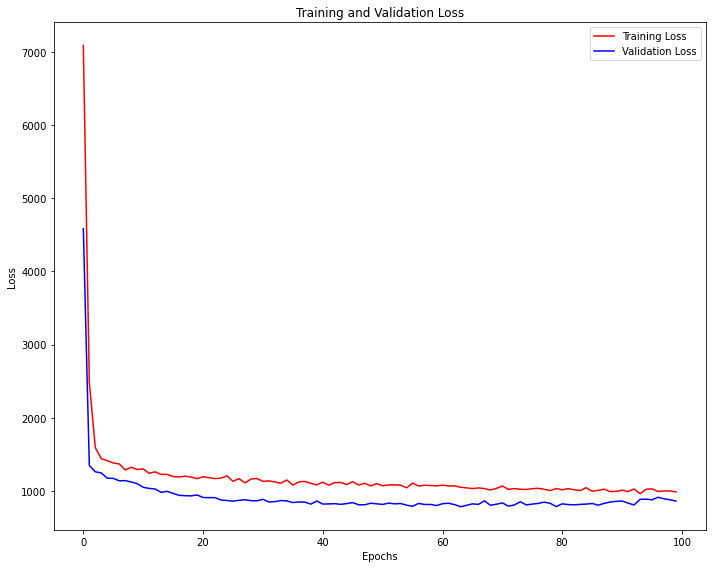

In [90]:
# Plot predictions
plt.figure(figsize=(10, 8))

plt.plot(history.history['loss'], label = 'Training Loss', color = 'red')
plt.plot(history.history['val_loss'], label = 'Validation Loss', color = 'blue')

plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Part 2: Semantic Analysis

<font size = "3"> The data was downloaded from Kaggle: https://www.kaggle.com/datasets/yasserh/twitter-tweets-sentiment-dataset
    

I used the TextBlob library to perform sentiment analysis on the collected posts. Each post's sentiment is classified as positive, neutral, or negative based on its polarity score. </font>

## • Install the necessary libraries

In [91]:
!pip install textblob

## • Import necessary libraries

In [92]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import string
from textblob import TextBlob
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [125]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to /Users/awa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/awa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/awa/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [156]:
# Load the CSV file into a DataFrame
df = pd.read_csv('Tweets.csv')

In [157]:
# Display the first few rows of the DataFrame
df.head()

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative


In [158]:
# Check the basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27481 entries, 0 to 27480
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   textID         27481 non-null  object
 1   text           27480 non-null  object
 2   selected_text  27480 non-null  object
 3   sentiment      27481 non-null  object
dtypes: object(4)
memory usage: 858.9+ KB


In [159]:
# df.drop(df.index[2000:27481], inplace = True)

In [160]:
# Ensure all text data is in string format
#df['text'] = df['text'].astype(str)

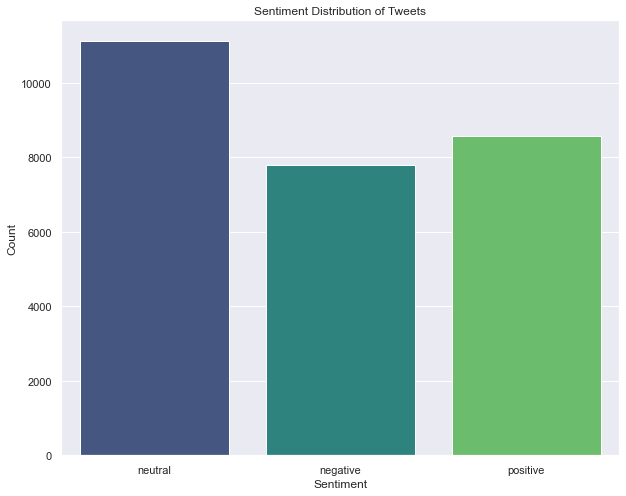

In [168]:
# Set the style
sns.set(style = "darkgrid")

# Plot the sentiment distribution
plt.figure(figsize = (10, 8))
sns.countplot(x = 'sentiment', data = df, palette = 'viridis')
plt.title('Sentiment Distribution of Tweets')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### •  Preprocess the Data Preprocessing involves cleaning the text data to make it suitable for analysis. This includes converting text to lowercase, removing punctuation, and tokenizing.

In [169]:
# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = word_tokenize(text)  # Tokenize text
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return text

In [170]:
# Apply preprocessing to the 'text' column
df['cleaned_text'] = df['text'].apply(lambda x: preprocess_text(str(x)))

In [171]:
# Display the first few rows of the DataFrame with cleaned text
df.head()

,textID,text,selected_text,sentiment,cleaned_text
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, responded, going]"
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, miss, san, diego]"
2,088c60f138,my boss is bullying me...,bullying me,negative,"[boss, bullying]"
3,9642c003ef,what interview! leave me alone,leave me alone,negative,"[interview, leave, alone]"
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,"[sons, couldnt, put, releases, already, bought]"


### • Perform Sentiment Analysis We will use the TextBlob library for sentiment analysis.

In [172]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(" ".join(text)).sentiment.polarity

In [173]:
# Apply sentiment analysis to the cleaned text
df['sentiment_score'] = df['cleaned_text'].apply(lambda x: get_sentiment(x))

In [174]:
# Classify the sentiment based on the polarity score
df['sentiment'] = df['sentiment_score'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

In [175]:
# Display the first few rows of the DataFrame with sentiment scores
df.head()

,textID,text,selected_text,sentiment,cleaned_text,sentiment_score
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,"[id, responded, going]",0.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,"[sooo, sad, miss, san, diego]",-0.5
2,088c60f138,my boss is bullying me...,bullying me,neutral,"[boss, bullying]",0.0
3,9642c003ef,what interview! leave me alone,leave me alone,neutral,"[interview, leave, alone]",0.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",neutral,"[sons, couldnt, put, releases, already, bought]",0.0


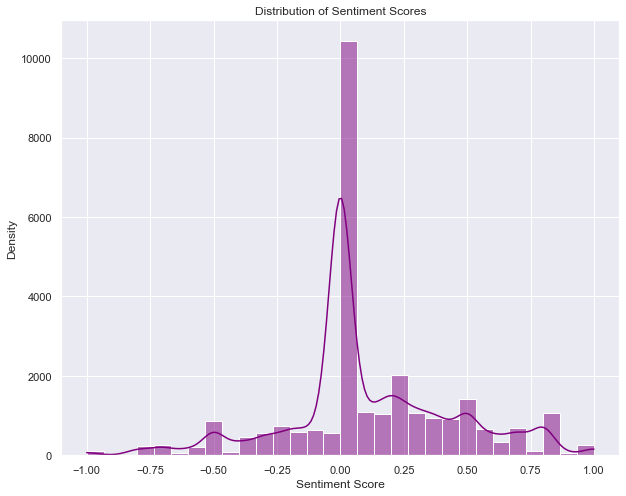

In [176]:
# Plot the sentiment scores
plt.figure(figsize = (10, 8))
sns.histplot(df['sentiment_score'], bins = 30, kde = True, color = 'purple')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Density')
plt.show()

### • Perform Topic Modeling We will use the gensim library for topic modeling.

In [155]:
!pip install gensim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 9.9 MB/s eta 0:00:00:00:010:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.7/17.7 MB 31.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.8 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
numba 0.54.1 requires numpy<1.21,>=1.17, but you have numpy 1.22.4 which is incompatible.
tensorflow 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 1.22.4 which is incompatible.


In [177]:
import gensim
from gensim import corpora

In [178]:
# Create a dictionary and corpus for topic modeling
texts = df['cleaned_text']
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

In [179]:
# Build LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics = 5, id2word = dictionary, passes = 15)

In [180]:
# Display the topics
topics = lda_model.print_topics(num_words = 4)
for topic in topics:
    print(topic)

(0, '0.028*"im" + 0.021*"work" + 0.020*"going" + 0.017*"go"')
(1, '0.014*"sorry" + 0.014*"sad" + 0.013*"hey" + 0.012*"im"')
(2, '0.008*"yes" + 0.006*"one" + 0.005*"birthday" + 0.005*"star"')
(3, '0.026*"day" + 0.016*"happy" + 0.015*"u" + 0.013*"lol"')
(4, '0.025*"like" + 0.014*"good" + 0.011*"feel" + 0.010*"im"')


In [181]:
# Topic Modeling
texts = df['cleaned_text']
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda_model = gensim.models.LdaModel(corpus, num_topics = 5, id2word = dictionary, passes = 15)

In [182]:
# Extract the topics and the top words
topics = lda_model.show_topics(formatted = False)

In [183]:
# Create a DataFrame for topics
topic_data = []
for i, topic in topics:
    for word, weight in topic:
        topic_data.append((i, word, weight))
topic_df = pd.DataFrame(topic_data, columns = ['Topic', 'Word', 'Weight'])

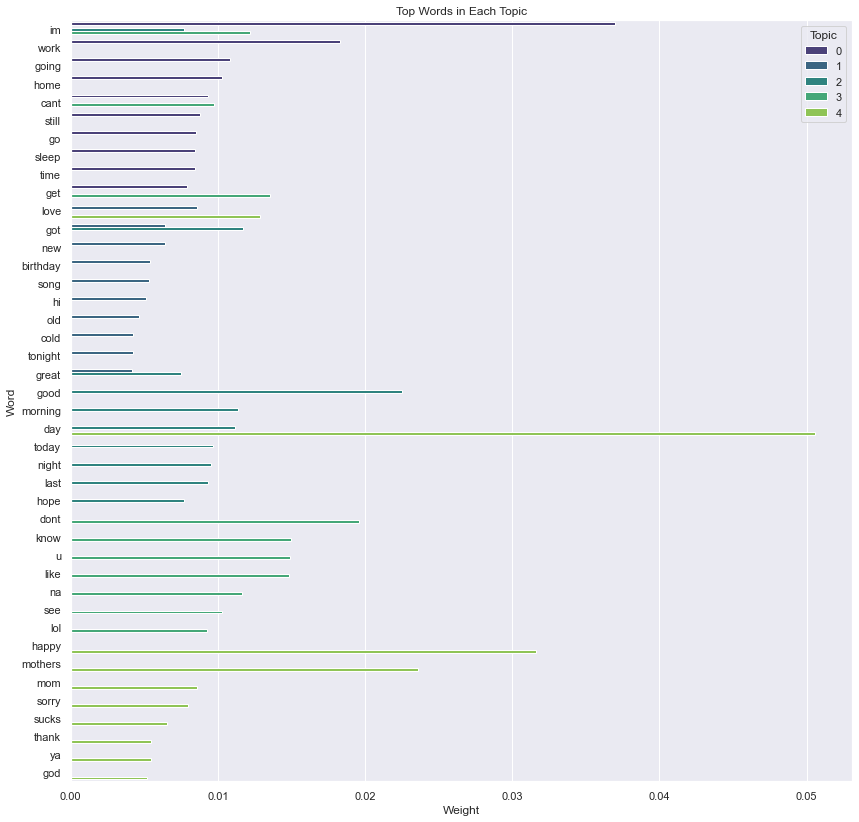

In [190]:
# Plot the top words in each topic
plt.figure(figsize = (14, 14))
sns.barplot(x = 'Weight', y = 'Word', hue = 'Topic', data = topic_df, palette = 'viridis')
plt.title('Top Words in Each Topic')
plt.xlabel('Weight')
plt.ylabel('Word')
plt.show()